In [12]:
def drop_outliers(dataset, columns_name):
    for chk in columns_name:
        
#         plt.boxplot(dataset[chk]) # please with graph & it is optional
        
        Q1 = dataset[chk].quantile(.25)
        Q3 = dataset[chk].quantile(.75)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[chk] >= (Q1-(1.5*IQR))) & (dataset[chk] <= (Q3+(1.5*IQR)))] 
    return dataset

In [2]:

from sklearn.base import TransformerMixin, BaseEstimator

from collections import Counter , defaultdict

import pandas as pd
from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns
# import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import datetime
import datetime as dt

In [3]:
#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

#preprocessing
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


import lightgbm as lgb

In [130]:


from sklearn.base import TransformerMixin, BaseEstimator

from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek # over sampling method 1



## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2

from imblearn.under_sampling import NearMiss


#preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [69]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [5]:
df = pd.read_csv("train_ctrUa4K.csv")

df_test = pd.read_csv("test_lAUu6dG.csv")
submission = pd.read_csv("sample_submission_49d68Cx.csv")

df10 = df.copy()
df.shape, df_test.shape, submission.shape


((614, 13), (367, 12), (367, 2))

In [110]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [111]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
614 + 367

981

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")
        

In [10]:
missing_val = get_percentage_miss_value(df)

Column->  Gender , total no of missing value :  13  & :          2.12  %
Column->  Married , total no of missing value :  3  & :          0.49  %
Column->  Dependents , total no of missing value :  15  & :          2.44  %
Column->  Self_Employed , total no of missing value :  32  & :          5.21  %
Column->  LoanAmount , total no of missing value :  22  & :          3.58  %
Column->  Loan_Amount_Term , total no of missing value :  14  & :          2.28  %
Column->  Credit_History , total no of missing value :  50  & :          8.14  %




There are no Higher Column Missing values in Dataset


In [11]:
missing_val = get_percentage_miss_value(df_test)

Column->  Gender , total no of missing value :  11  & :          3.0  %
Column->  Dependents , total no of missing value :  10  & :          2.72  %
Column->  Self_Employed , total no of missing value :  23  & :          6.27  %
Column->  LoanAmount , total no of missing value :  5  & :          1.36  %
Column->  Loan_Amount_Term , total no of missing value :  6  & :          1.63  %
Column->  Credit_History , total no of missing value :  29  & :          7.9  %




There are no Higher Column Missing values in Dataset


In [16]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,24))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show() 
    


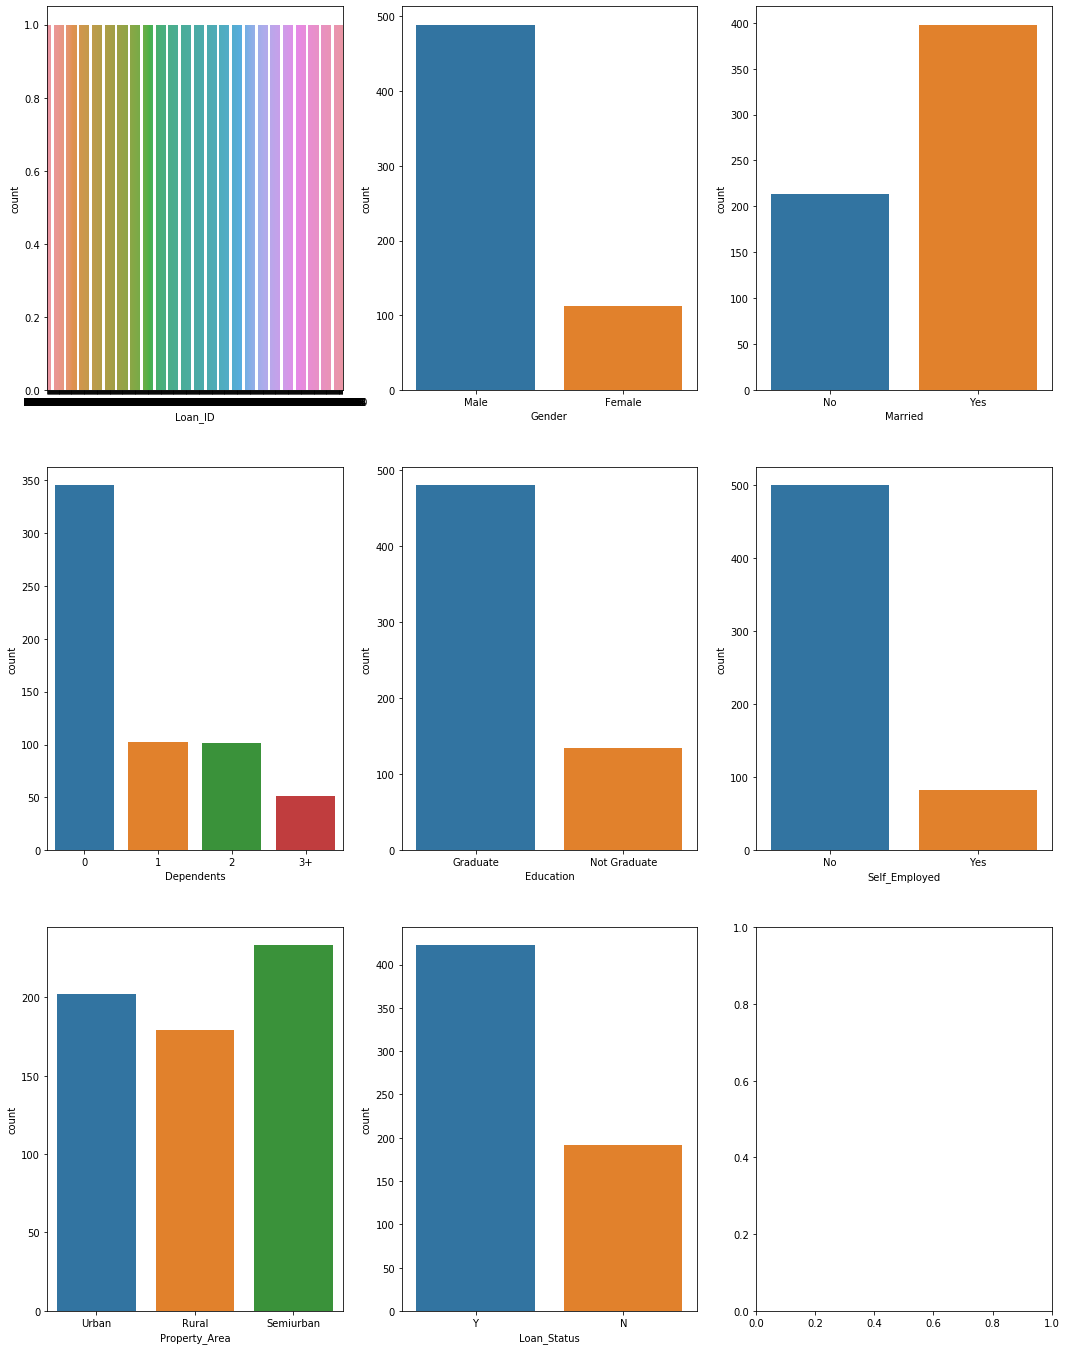

In [17]:
visualize_categorical_values(df)

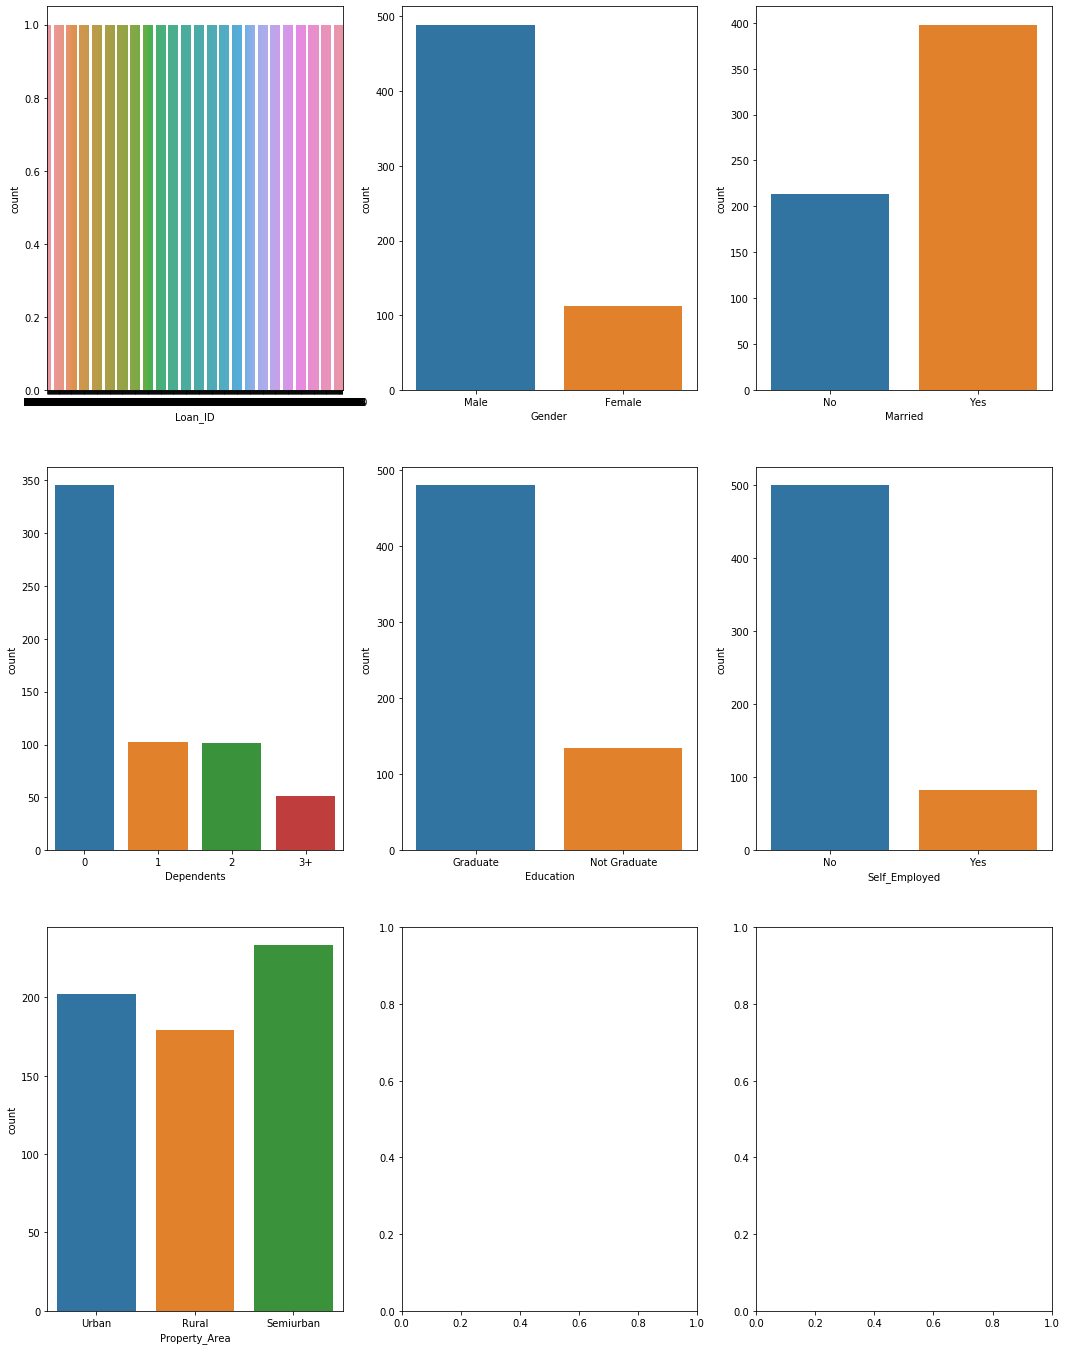

In [18]:
visualize_categorical_values(df_test)

In [19]:
def visualize_numberical_values(dataset):
    plt.figure(figsize=(18,34))
    sns.pairplot(df)
    plt.show()


<Figure size 1296x2448 with 0 Axes>

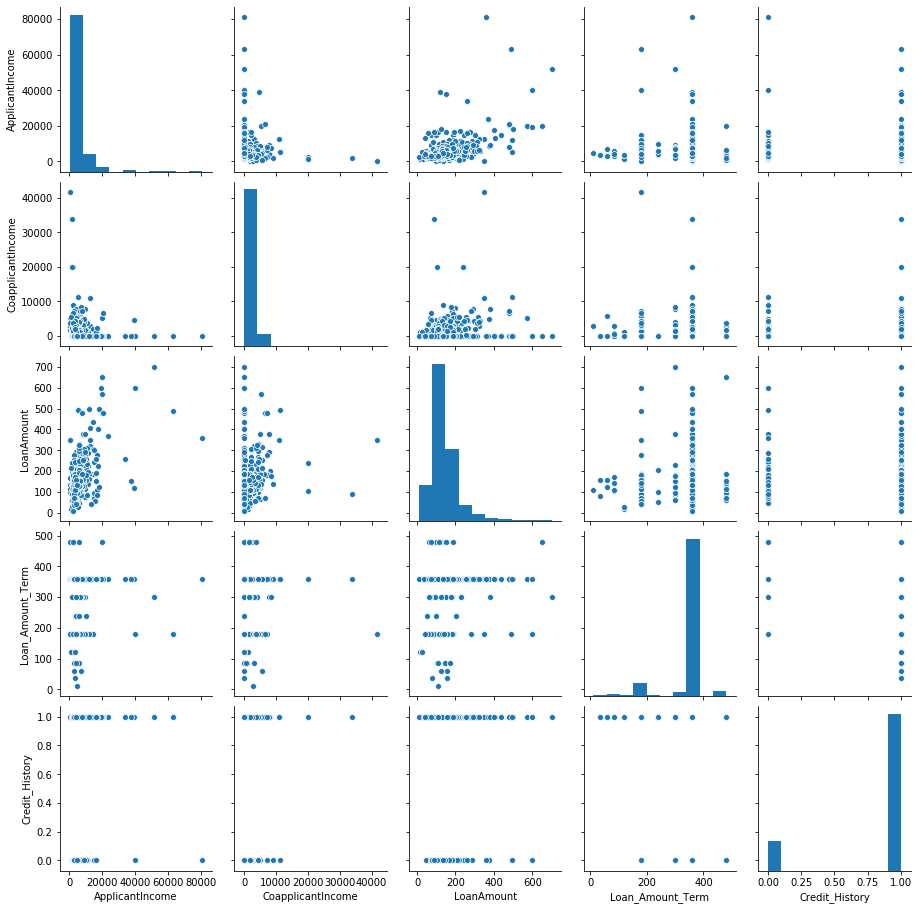

In [20]:
visualize_numberical_values(df)

<Figure size 1296x2448 with 0 Axes>

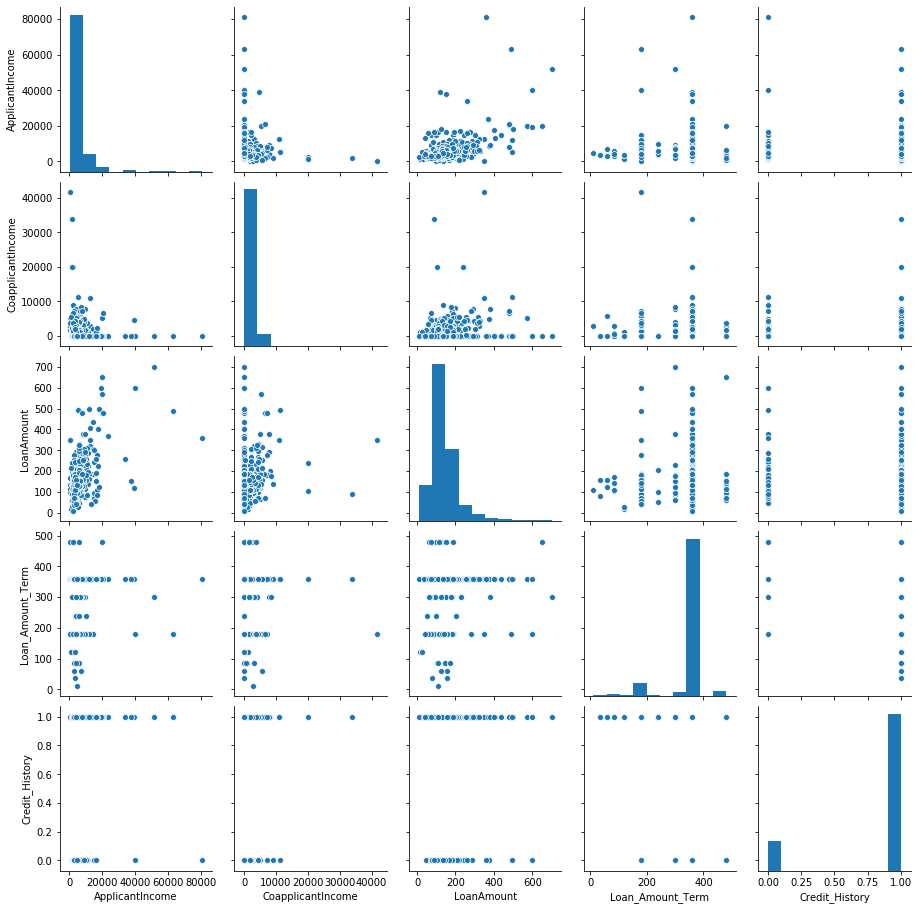

In [21]:
visualize_numberical_values(df_test)

In [26]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")


In [27]:
check_cloumn_details_type_categorical(df)

Columns name :   Loan_ID
{'LP001002': 1, 'LP001003': 1, 'LP001005': 1, 'LP001006': 1, 'LP001008': 1, 'LP001011': 1, 'LP001013': 1, 'LP001014': 1, 'LP001018': 1, 'LP001020': 1, 'LP001024': 1, 'LP001027': 1, 'LP001028': 1, 'LP001029': 1, 'LP001030': 1, 'LP001032': 1, 'LP001034': 1, 'LP001036': 1, 'LP001038': 1, 'LP001041': 1, 'LP001043': 1, 'LP001046': 1, 'LP001047': 1, 'LP001050': 1, 'LP001052': 1, 'LP001066': 1, 'LP001068': 1, 'LP001073': 1, 'LP001086': 1, 'LP001087': 1, 'LP001091': 1, 'LP001095': 1, 'LP001097': 1, 'LP001098': 1, 'LP001100': 1, 'LP001106': 1, 'LP001109': 1, 'LP001112': 1, 'LP001114': 1, 'LP001116': 1, 'LP001119': 1, 'LP001120': 1, 'LP001123': 1, 'LP001131': 1, 'LP001136': 1, 'LP001137': 1, 'LP001138': 1, 'LP001144': 1, 'LP001146': 1, 'LP001151': 1, 'LP001155': 1, 'LP001157': 1, 'LP001164': 1, 'LP001179': 1, 'LP001186': 1, 'LP001194': 1, 'LP001195': 1, 'LP001197': 1, 'LP001198': 1, 'LP001199': 1, 'LP001205': 1, 'LP001206': 1, 'LP001207': 1, 'LP001213': 1, 'LP001222': 1,

In [28]:
check_cloumn_details_type_categorical(df_test)

Columns name :   Loan_ID
{'LP001015': 1, 'LP001022': 1, 'LP001031': 1, 'LP001035': 1, 'LP001051': 1, 'LP001054': 1, 'LP001055': 1, 'LP001056': 1, 'LP001059': 1, 'LP001067': 1, 'LP001078': 1, 'LP001082': 1, 'LP001083': 1, 'LP001094': 1, 'LP001096': 1, 'LP001099': 1, 'LP001105': 1, 'LP001107': 1, 'LP001108': 1, 'LP001115': 1, 'LP001121': 1, 'LP001124': 1, 'LP001128': 1, 'LP001135': 1, 'LP001149': 1, 'LP001153': 1, 'LP001163': 1, 'LP001169': 1, 'LP001174': 1, 'LP001176': 1, 'LP001177': 1, 'LP001183': 1, 'LP001185': 1, 'LP001187': 1, 'LP001190': 1, 'LP001203': 1, 'LP001208': 1, 'LP001210': 1, 'LP001211': 1, 'LP001219': 1, 'LP001220': 1, 'LP001221': 1, 'LP001226': 1, 'LP001230': 1, 'LP001231': 1, 'LP001232': 1, 'LP001237': 1, 'LP001242': 1, 'LP001268': 1, 'LP001270': 1, 'LP001284': 1, 'LP001287': 1, 'LP001291': 1, 'LP001298': 1, 'LP001312': 1, 'LP001313': 1, 'LP001317': 1, 'LP001321': 1, 'LP001323': 1, 'LP001324': 1, 'LP001332': 1, 'LP001335': 1, 'LP001338': 1, 'LP001347': 1, 'LP001348': 1,

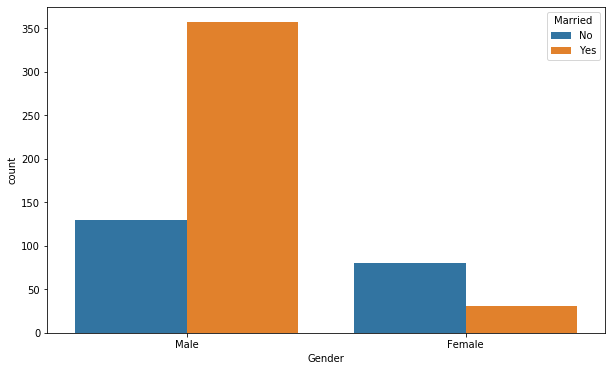

In [38]:
sns.countplot(df.Gender, hue = df.Married)

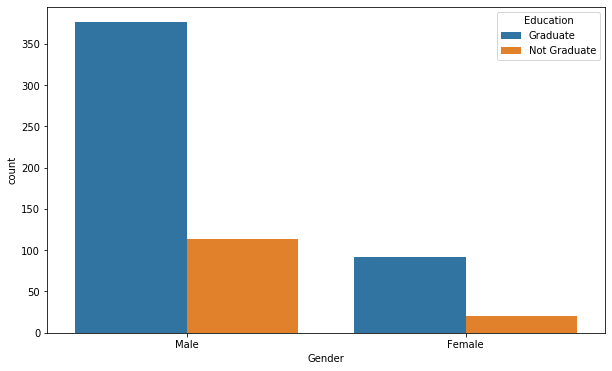

In [39]:
sns.countplot(df.Gender, hue = df.Education)

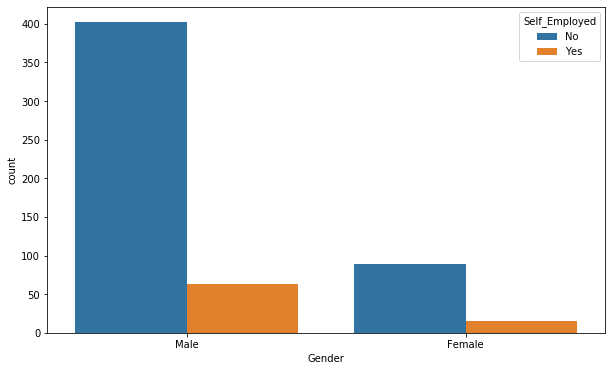

In [41]:
sns.countplot(df.Gender, hue = df.Self_Employed )

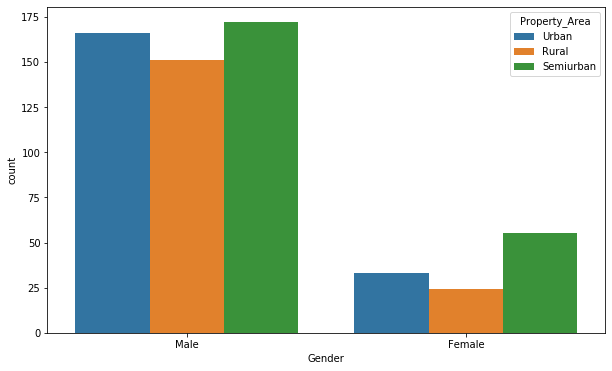

In [42]:
sns.countplot(df.Gender, hue = df.Property_Area )

In [44]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")


In [45]:
check_cloumn_details_type_numberical(df) 


Columns name :   ApplicantIncome
{5849: 1, 4583: 6, 3000: 3, 2583: 4, 6000: 6, 5417: 3, 2333: 3, 3036: 1, 4006: 1, 12841: 1, 3200: 2, 2500: 9, 3073: 1, 1853: 1, 1299: 1, 4950: 1, 3596: 1, 3510: 2, 4887: 1, 2600: 6, 7660: 1, 5955: 1, 3365: 1, 3717: 2, 9560: 1, 2799: 1, 4226: 1, 1442: 1, 3750: 5, 4166: 5, 3167: 3, 4692: 1, 3500: 3, 12500: 1, 2275: 1, 1828: 1, 3667: 2, 3748: 1, 3600: 1, 1800: 2, 2400: 4, 3941: 1, 4695: 1, 3410: 1, 5649: 1, 5821: 1, 2645: 1, 4000: 3, 1928: 1, 3086: 1, 4230: 1, 4616: 1, 11500: 1, 2708: 1, 2132: 1, 3366: 1, 8080: 1, 3357: 1, 3029: 1, 2609: 1, 4945: 1, 5726: 1, 10750: 1, 7100: 1, 4300: 2, 3208: 1, 1875: 1, 4755: 1, 5266: 1, 1000: 1, 3333: 5, 3846: 1, 2395: 1, 1378: 1, 3988: 1, 2366: 1, 8566: 1, 5695: 1, 2958: 1, 6250: 4, 3273: 1, 4133: 1, 3620: 1, 6782: 1, 2484: 1, 1977: 1, 4188: 1, 1759: 1, 4288: 1, 4843: 1, 13650: 1, 4652: 2, 3816: 1, 3052: 1, 11417: 1, 7333: 2, 3800: 1, 2071: 1, 5316: 1, 2929: 1, 3572: 1, 7451: 1, 5050: 1, 14583: 2, 2214: 1, 5568: 1, 10408

In [46]:
check_cloumn_details_type_numberical(df_test) 


Columns name :   ApplicantIncome
{5720: 1, 3076: 1, 5000: 6, 2340: 1, 3276: 2, 2165: 1, 2226: 1, 3881: 1, 13633: 1, 2400: 2, 3091: 1, 2185: 1, 4166: 1, 12173: 1, 4666: 1, 5667: 2, 4583: 1, 3786: 1, 9226: 1, 1300: 1, 1888: 1, 2083: 1, 3909: 1, 3765: 1, 5400: 1, 0: 2, 4363: 1, 7500: 4, 3772: 1, 2942: 1, 2478: 1, 6250: 1, 3268: 1, 2783: 2, 2740: 1, 3150: 1, 7350: 1, 2267: 1, 5833: 3, 3643: 1, 5629: 1, 3644: 1, 1750: 2, 6500: 3, 3666: 1, 4260: 1, 4163: 1, 2356: 1, 6792: 1, 8000: 1, 2419: 1, 3500: 6, 4116: 1, 5293: 1, 2750: 1, 4402: 1, 3613: 1, 2779: 1, 4720: 1, 2415: 1, 7016: 1, 4968: 1, 2101: 1, 4490: 1, 2917: 1, 4700: 2, 3445: 1, 7666: 1, 2458: 1, 3250: 2, 4463: 1, 4083: 3, 3900: 1, 4750: 1, 3583: 1, 3189: 1, 6356: 1, 3413: 1, 7950: 1, 3829: 1, 72529: 1, 4136: 1, 8449: 1, 4456: 1, 4635: 1, 3571: 1, 3066: 1, 3235: 1, 5058: 1, 3188: 1, 13518: 1, 4364: 1, 4766: 1, 4609: 1, 6260: 1, 3333: 5, 9719: 1, 6835: 1, 4452: 1, 2262: 1, 3901: 1, 2687: 1, 2243: 1, 3417: 3, 1596: 1, 4513: 1, 4500: 2, 45

In [47]:
check_cloumn_details_type_float(df)

Columns name :   CoapplicantIncome
{0.0: 273, 1508.0: 1, 2358.0: 1, 4196.0: 1, 1516.0: 1, 2504.0: 1, 1526.0: 1, 10968.0: 1, 700.0: 1, 1840.0: 1, 8106.0: 1, 2840.0: 1, 1086.0: 1, 3500.0: 2, 5625.0: 3, 1911.0: 1, 1917.0: 2, 2925.0: 2, 2253.0: 1, 1040.0: 1, 2083.0: 5, 3369.0: 1, 1667.0: 2, 3000.0: 2, 2067.0: 1, 1330.0: 1, 1459.0: 3, 7210.0: 1, 1668.0: 1, 1213.0: 1, 2336.0: 1, 3440.0: 1, 2275.0: 1, 1644.0: 1, 1167.0: 1, 1591.0: 1, 2200.0: 1, 2250.0: 3, 2859.0: 1, 3796.0: 1, 3449.0: 1, 4595.0: 1, 2254.0: 1, 3066.0: 1, 1875.0: 1, 1774.0: 1, 4750.0: 2, 3022.0: 1, 4000.0: 1, 2166.0: 1, 1881.0: 1, 2531.0: 2, 2000.0: 2, 2118.0: 1, 4167.0: 2, 2900.0: 1, 5654.0: 1, 1820.0: 1, 2302.0: 1, 997.0: 1, 3541.0: 1, 3263.0: 1, 3806.0: 1, 3583.0: 1, 754.0: 2, 1030.0: 1, 1126.0: 1, 3600.0: 1, 2333.0: 3, 4114.0: 1, 2283.0: 1, 1398.0: 1, 2142.0: 1, 2667.0: 1, 8980.0: 1, 2014.0: 1, 1640.0: 2, 3850.0: 1, 2569.0: 2, 1929.0: 1, 7750.0: 1, 1430.0: 2, 2034.0: 1, 4486.0: 1, 1425.0: 1, 1666.0: 5, 830.0: 1, 3750.0: 2, 

In [48]:
check_cloumn_details_type_float(df_test)

Columns name :   LoanAmount
{110.0: 10, 126.0: 4, 208.0: 1, 100.0: 9, 78.0: 2, 152.0: 4, 59.0: 1, 147.0: 3, 280.0: 1, 123.0: 4, 90.0: 9, 162.0: 4, 40.0: 3, 166.0: 1, 124.0: 3, 131.0: 5, 200.0: 5, 300.0: 3, 48.0: 1, 28.0: 2, 101.0: 2, 125.0: 11, 290.0: 1, 148.0: 3, 140.0: 4, 275.0: 1, 57.0: 1, 75.0: 2, 192.0: 1, 158.0: 3, 176.0: 5, 185.0: 5, 116.0: 4, 138.0: 4, 84.0: 3, 108.0: 8, 187.0: 9, 120.0: 9, 160.0: 5, 30.0: 1, 92.0: 3, 130.0: 8, 134.0: 2, 189.0: 1, 135.0: 7, 188.0: 2, 95.0: 3, 65.0: 4, 139.0: 3, 232.0: 1, 144.0: 2, 155.0: 1, 186.0: 1, 50.0: 2, nan: 1, 163.0: 1, 360.0: 1, 149.0: 3, 257.0: 1, 102.0: 4, 77.0: 1, 390.0: 1, 256.0: 1, 61.0: 1, nan: 1, 107.0: 2, 119.0: 2, 165.0: 3, 93.0: 1, 122.0: 5, 157.0: 1, 180.0: 4, 80.0: 6, 104.0: 5, 213.0: 1, 146.0: 2, 71.0: 1, 225.0: 1, 70.0: 4, 132.0: 3, 105.0: 4, 83.0: 2, 103.0: 1, 150.0: 12, 550.0: 1, 260.0: 2, 199.0: 1, 113.0: 3, 117.0: 4, 72.0: 1, 214.0: 1, 133.0: 2, 143.0: 4, 209.0: 1, 170.0: 2, 94.0: 2, 79.0: 1, 159.0: 1, 173.0: 1, 235.0:

In [62]:
def corr_metrix(dataset):
    corr = dataset.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(18, 24))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .3});
    ax.tick_params(labelsize=20)



def corr_2_more_visualize(dataset):
    corr = dataset.corr()
    
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
    ax.tick_params(labelsize=20)
    plt.show()

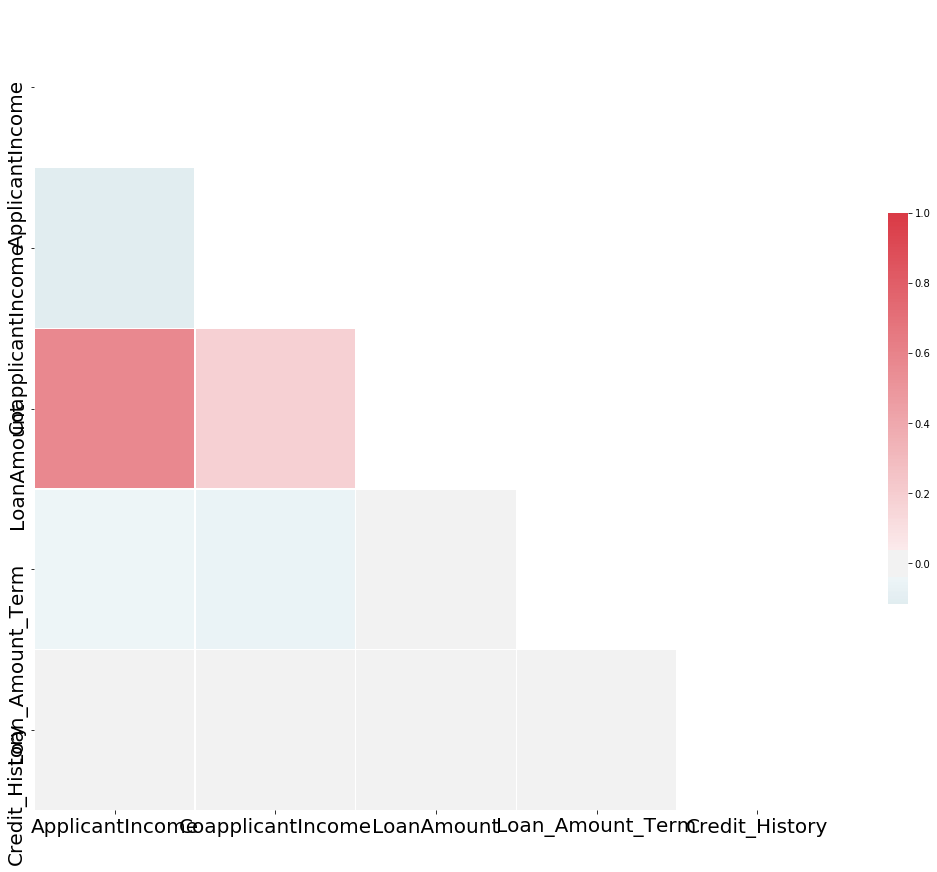

In [63]:
corr_metrix(df)

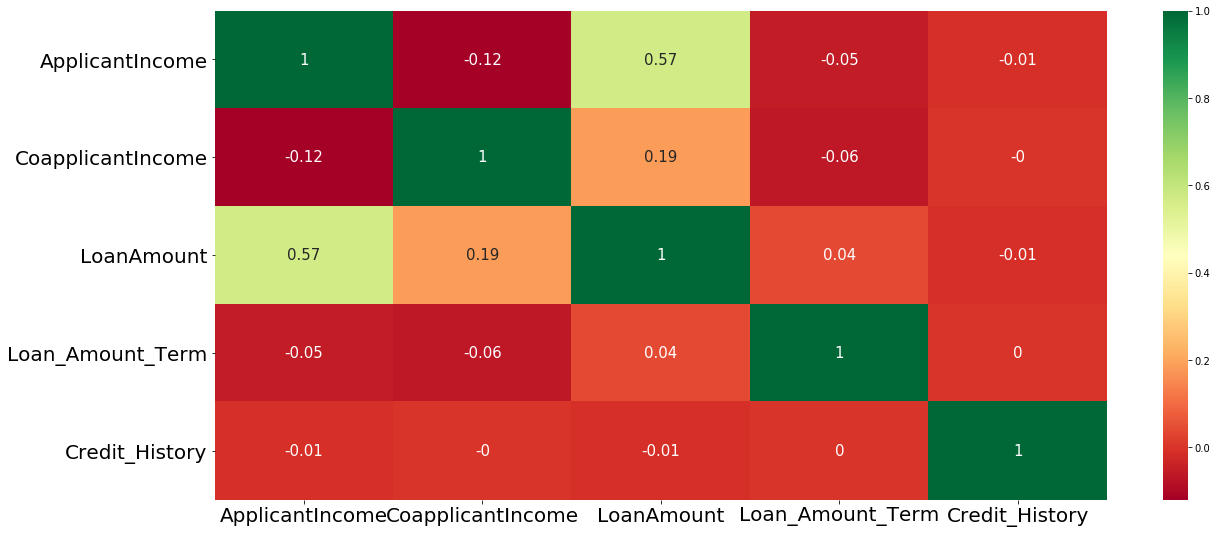

In [64]:
corr_2_more_visualize(df)

# <font color ='red' > EDA
    Step 1) Data Cleaning

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [145]:
df1 = df.drop(["Loan_ID"] , axis=1)

df.shape, df1.shape

((614, 13), (614, 12))

In [146]:
df1_test = df_test.drop(["Loan_ID"] , axis=1)

df_test.shape, df1_test.shape

((367, 12), (367, 11))

In [147]:
df2 = DataFrameImputer().fit_transform(df1)
df2.shape

(614, 12)

In [148]:
df2_test = DataFrameImputer().fit_transform(df1_test)
df2_test.shape

(367, 11)

In [149]:
df2.isna().sum().sum()

0

In [150]:
df2_test.isna().sum().sum()

0

# 2)Data Preprocessing

In [151]:
#Label encoding
def convert_to_numerical_datatype_train(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset


In [152]:
df3 = convert_to_numerical_datatype_train(df2.copy())
df3.shape

(614, 12)

In [153]:
df3.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [155]:
df3_test = convert_to_numerical_datatype_train(df2_test.copy())
df3_test.shape

(367, 11)

In [156]:
df3_test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2


In [158]:
# check_skewness_numerical(df3 , "Loan_Status")

In [159]:
# Counter(df3.Loan_Status)

In [163]:
def standardscaler_preprocessing(dataset_train, dataset_test, num_col):
    scaler = StandardScaler()
   
    dataset_train[num_col] = scaler.fit_transform(dataset_train[num_col])

    dataset_test[num_col] = scaler.transform(dataset_test[num_col])
    
    return dataset_train, dataset_test
    

In [164]:
# df5 = df3.copy()

In [165]:
df4, df4_test = standardscaler_preprocessing(df3.copy(), df3_test.copy(), column_name )

In [166]:
df2.Loan_Amount_Term.mean() , df2.Loan_Amount_Term.median()

(342.0, 360.0)

In [167]:
# Counter(df2.Loan_Amount_Term)

In [168]:
Counter(df2.Credit_History)

Counter({1.0: 475, 0.0: 89, 0.8421985815602837: 50})

In [171]:
X = df4.iloc[:, :-1]
Y = df4.iloc[:, -1]

In [172]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Dataset type is : ", dataset_type)
    
    accuracy = accuracy_score(y_train_val, y_pred_val)
    accuracy = round(accuracy, 4) * 100
    print("\n Accuracy Score     : ",accuracy)
    
    precision_accuracy = precision_score(y_train_val, y_pred_val)
    precision_accuracy = round(precision_accuracy, 4) * 100
    print("\n precision_accuracy : ",precision_accuracy)
    
    recall_accuracy = recall_score(y_train_val, y_pred_val)
    recall_accuracy = round(recall_accuracy, 4) * 100
    print("\n recall_accuracy    : ",recall_accuracy)
    
    roc_auc_accuracy = roc_auc_score(y_train_val, y_pred_val)
    roc_auc_accuracy = round(roc_auc_accuracy, 4) * 100
    print("\n roc_auc_accuracy   : ",roc_auc_accuracy)
    
    
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 4) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 4) * 100
            
            roc_auc_score_acc = roc_auc_score(y_test, y_pred)
            roc_auc_score_acc = round(roc_auc_score_acc, 4) * 100
            

            row = [names[j],   i,   train_acc, test_acc, roc_auc_score_acc]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    

    
    
names_regression = [ "LightGBM", "RF", "XGBoost"]
algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc" , "roc_auc_score"]

random_state_list_up_to_10 = [1,2,3]


addRandomStateForAlgorithm(X,Y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

      Model  Random_state  Train_acc  Test_acc  roc_auc_score
0  LightGBM             1      98.26     76.62          68.71
1  LightGBM             2      98.48     76.62          68.67
2  LightGBM             3      98.48     74.68          68.46
3        RF             1     100.00     77.92          68.57
4        RF             2     100.00     75.32          66.21
5        RF             3     100.00     81.17          68.18
6   XGBoost             1      86.09     77.92          68.57
7   XGBoost             2      86.96     74.03          64.25
8   XGBoost             3      86.96     80.52          65.56


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X ,Y , test_size = 0.05 , random_state = 10)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

y_pred_final = gbm.predict(df4_test, num_iteration=gbm.best_iteration)

Starting training...
[1]	valid_0's l2: 0.179111	valid_0's l1: 0.395358
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.175883	valid_0's l1: 0.391716
[3]	valid_0's l2: 0.17192	valid_0's l1: 0.386829
[4]	valid_0's l2: 0.169348	valid_0's l1: 0.383395
[5]	valid_0's l2: 0.167193	valid_0's l1: 0.379956
[6]	valid_0's l2: 0.164487	valid_0's l1: 0.375773
[7]	valid_0's l2: 0.162961	valid_0's l1: 0.372152
[8]	valid_0's l2: 0.160385	valid_0's l1: 0.367754
[9]	valid_0's l2: 0.159655	valid_0's l1: 0.364643
[10]	valid_0's l2: 0.158748	valid_0's l1: 0.361556
[11]	valid_0's l2: 0.159424	valid_0's l1: 0.360372
[12]	valid_0's l2: 0.160617	valid_0's l1: 0.359754
[13]	valid_0's l2: 0.160543	valid_0's l1: 0.357479
[14]	valid_0's l2: 0.160402	valid_0's l1: 0.355006
[15]	valid_0's l2: 0.16063	valid_0's l1: 0.353154
Early stopping, best iteration is:
[10]	valid_0's l2: 0.158748	valid_0's l1: 0.361556


In [175]:
submission_1 = submission.copy()
submission_1.head(2)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N


In [180]:
# Counter(submission_1.Loan_Status)

print(df_test.shape , submission.shape , len(y_pred_final))


(367, 12) (367, 2) 367


In [181]:
print(df_test.shape , submission.shape , len(y_pred_final))


(367, 12) (367, 2) 367


In [177]:
submission_1["Loan_Status"] = y_pred_final

In [178]:
# print(submission_1["target"].values)

In [179]:
submission_1.to_csv('submission_2.csv', index=False)

df_submission_1 = pd.read_csv('submission_2.csv')
print(df_submission_1.shape)

df_submission_1.head(3)

(367, 2)


,Loan_ID,Loan_Status
0,LP001015,0.727120
1,LP001022,0.810858
2,LP001031,0.706020
